# Variability Heatmap (Detail)

環境変動が利得構造に影響する場合。

In [1]:
using DataFrames: DataFrame, AbstractDataFrame, groupby
using Plots: Plot, plot, heatmap
using GLM

include("../src/SimPlot.jl")
using .SimPlot

In [2]:
function plot_heatmap(df::AbstractDataFrame, symbol::Symbol)::Plot
    β = sort(unique(df.β))
    σ = sort(unique(df.σ))

    return heatmap(
        σ,
        β,
        reshape([SimPlot.get_value(df, s, b, :σ, :β, symbol) for b in β, s in σ], length(β), length(σ)),
        xlabel = "σ",
        ylabel = "β",
        xlims = (-0.025, 1.025),
        ylims = (-0.025, 1.025),
        xticks = 0:0.1:1,
        yticks = 0:0.1:1,
        title = symbol,
    )
end

function make_asterisk(value::Float64)::String
    if value < 0.001
        "***"
    elseif value < 0.01
        "**"
    elseif value < 0.05
        "*"
    else
        ""
    end
end

function fit_and_extract(formula::FormulaTerm, df::AbstractDataFrame)::DataFrame
    lm_fit = lm(formula, df)
    _coef = coef(lm_fit)
    _pvals = coeftable(lm_fit).cols[4]  # Assuming p-values are in column 4

    return DataFrame(
        formula = string(formula),
        Intercept = _coef[1],
        β = _coef[2],
        σ = _coef[3],
        p_β = _pvals[2],
        p_σ = _pvals[3],
        eval_β = make_asterisk(_pvals[2]),
        eval_σ = make_asterisk(_pvals[3]),
        impact_β = _coef[2] / _coef[1] > 0.1 ? round(_coef[2] / _coef[1], digits = 2) : "",
        impact_σ = _coef[3] / _coef[1] > 0.1 ? round(_coef[3] / _coef[1], digits = 2) : "",
    )
end

formula_vec = [
    @formula(cooperation_rate ~ β + σ),
    @formula(weak_component1_count ~ β + σ),
    @formula(weak_component1_size_μ ~ β + σ),
    @formula(weak_component1_size_max ~ β + σ),
    @formula(weak_component2_count ~ β + σ),
    @formula(weak_component2_size_μ ~ β + σ),
    @formula(weak_component2_size_max ~ β + σ),
    @formula(medium_component1_count ~ β + σ),
    @formula(medium_component1_size_μ ~ β + σ),
    @formula(medium_component1_size_max ~ β + σ),
    @formula(medium_component2_count ~ β + σ),
    @formula(medium_component2_size_μ ~ β + σ),
    @formula(medium_component2_size_max ~ β + σ),
    @formula(strong_component1_count ~ β + σ),
    @formula(strong_component1_size_μ ~ β + σ),
    @formula(strong_component1_size_max ~ β + σ),
    @formula(strong_component2_count ~ β + σ),
    @formula(strong_component2_size_μ ~ β + σ),
    @formula(strong_component2_size_max ~ β + σ),
];

size(mean_df) = (667, 56)


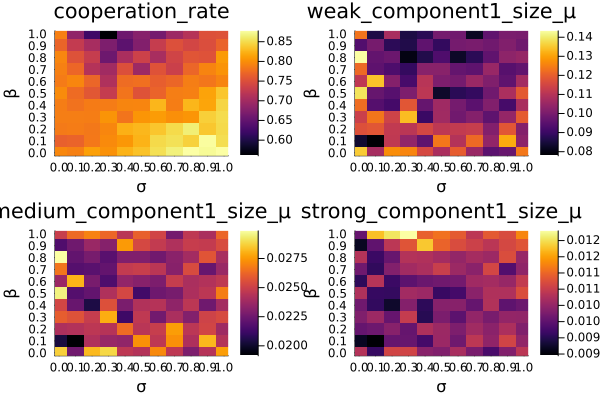

In [3]:
df_vec = SimPlot.csv_to_df(["20231026_175209"]); # T = 1.1, S = -0.1
columns = names(df_vec[1])
key_columns = columns[[1; 3:11]]
value_columns = columns[[2; 13:end]]
mean_df = SimPlot.make_mean_df(df_vec, key_columns, value_columns)
@show size(mean_df)
plot(
    plot_heatmap(mean_df, :cooperation_rate),
    plot_heatmap(mean_df, :weak_component1_size_μ),
    plot_heatmap(mean_df, :medium_component1_size_μ),
    plot_heatmap(mean_df, :strong_component1_size_μ),
)

size(mean_df) = (1210, 56)


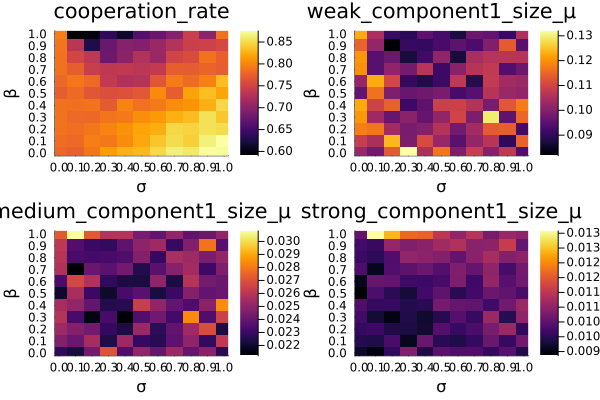

In [4]:
df_vec = SimPlot.csv_to_df(["20231103_065010"]); # T = 1.1, S = -0.1
columns = names(df_vec[1])
key_columns = columns[[1; 3:11]]
value_columns = columns[[2; 13:end]]
mean_df = SimPlot.make_mean_df(df_vec, key_columns, value_columns)
@show size(mean_df)
plot(
    plot_heatmap(mean_df, :cooperation_rate),
    plot_heatmap(mean_df, :weak_component1_size_μ),
    plot_heatmap(mean_df, :medium_component1_size_μ),
    plot_heatmap(mean_df, :strong_component1_size_μ),
)

size(mean_df) = (1210, 56)


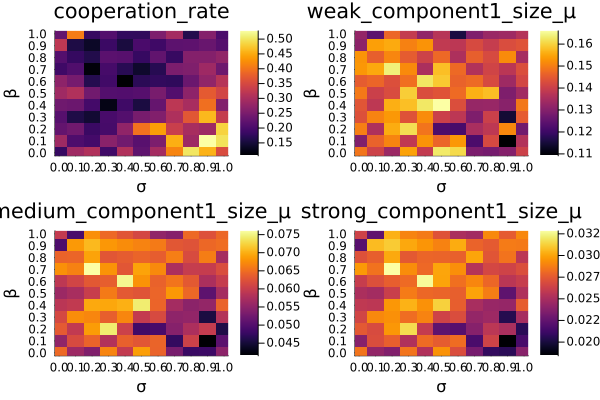

In [5]:
df_vec = SimPlot.csv_to_df(["20231102_213633"]); # T = 1.1, S = -0.2
columns = names(df_vec[1])
key_columns = columns[[1; 3:11]]
value_columns = columns[[2; 13:end]]
mean_df = SimPlot.make_mean_df(df_vec, key_columns, value_columns)
@show size(mean_df)
plot(
    plot_heatmap(mean_df, :cooperation_rate),
    plot_heatmap(mean_df, :weak_component1_size_μ),
    plot_heatmap(mean_df, :medium_component1_size_μ),
    plot_heatmap(mean_df, :strong_component1_size_μ),
)

size(mean_df) = (1210, 56)


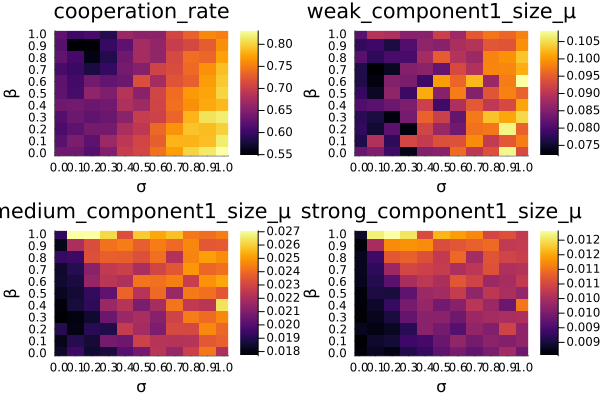

In [6]:
df_vec = SimPlot.csv_to_df(["20231102_110543"]); # T = 1.2, S = -0.1
columns = names(df_vec[1])
key_columns = columns[[1; 3:11]]
value_columns = columns[[2; 13:end]]
mean_df = SimPlot.make_mean_df(df_vec, key_columns, value_columns)
@show size(mean_df)
plot(
    plot_heatmap(mean_df, :cooperation_rate),
    plot_heatmap(mean_df, :weak_component1_size_μ),
    plot_heatmap(mean_df, :medium_component1_size_μ),
    plot_heatmap(mean_df, :strong_component1_size_μ),
)

size(mean_df) = (1210, 56)


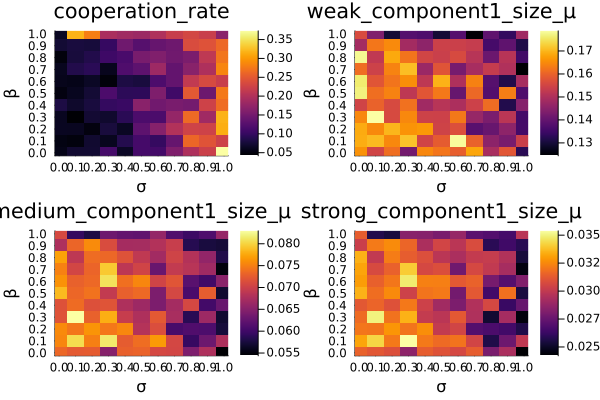

In [7]:
df_vec = SimPlot.csv_to_df(["20231030_153739"]); # T = 1.2, S = -0.2
columns = names(df_vec[1])
key_columns = columns[[1; 3:11]]
value_columns = columns[[2; 13:end]]
mean_df = SimPlot.make_mean_df(df_vec, key_columns, value_columns)
@show size(mean_df)
plot(
    plot_heatmap(mean_df, :cooperation_rate),
    plot_heatmap(mean_df, :weak_component1_size_μ),
    plot_heatmap(mean_df, :medium_component1_size_μ),
    plot_heatmap(mean_df, :strong_component1_size_μ),
)